Determinar a probabilidade do usuário de comprar uma SUV, baseado em sua idade e salário. Utilizando a base de dados *SUV_Network_Ads.csv*

Não esqueça de realizar a análise descritiva e verificar todas as suposições.

Faça a interpretação do ODDS.

In [ ]:
#Import das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy.stats import zscore

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SUV_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, -1].values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
df.isnull().sum()

,0
User ID,0
Gender,0
Age,0
EstimatedSalary,0
Purchased,0


In [ ]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [ ]:
df.shape

(400, 5)

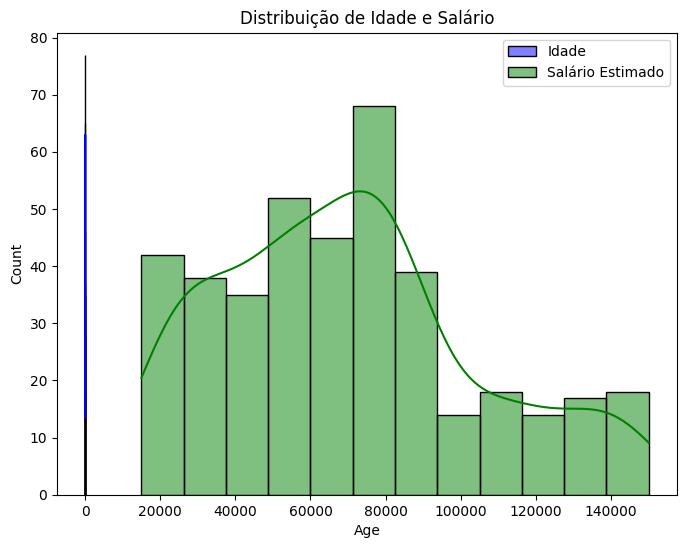

In [ ]:
# Visualização inicial
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], kde=True, color='blue', label='Idade')
sns.histplot(df['EstimatedSalary'], kde=True, color='green', label='Salário Estimado')
plt.legend()
plt.title("Distribuição de Idade e Salário")
plt.show()

<ipython-input-58-972fb63a1b7c>:38: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


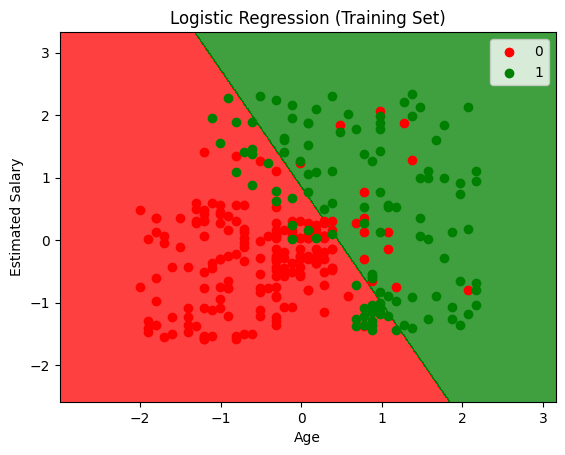

<ipython-input-58-972fb63a1b7c>:55: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],


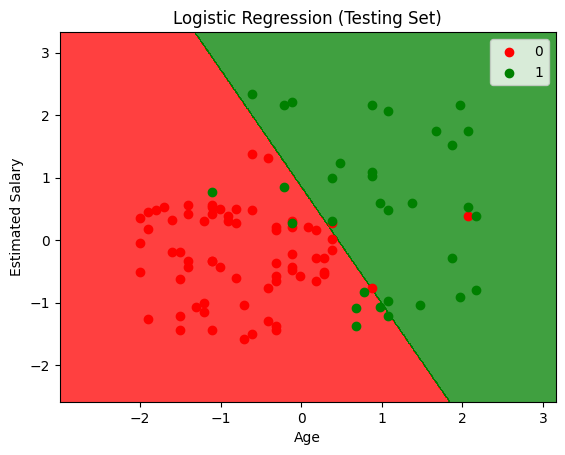

In [ ]:
#Logistic Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 0)

# Feature Scaling
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


#Fitting Logistic Regression into the training set
classifier = LR(random_state=0)
classifier.fit(X_train, y_train)

#Predicting the test results
y_pred = classifier.predict(X_test)

#Making the confusion matrix
cm = confusion_matrix(y_test, y_pred)

#Visualising the Training test results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step= 0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step= 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

#Visualising the Testing test results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min()-1, stop=X_set[:, 0].max()+1, step= 0.01),
                     np.arange(start=X_set[:, 1].min()-1, stop=X_set[:, 1].max()+1, step= 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75,cmap= ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j, 0], X_set[y_set==j, 1],
                c = ListedColormap(('red', 'green'))(i), label=j)
plt.title('Logistic Regression (Testing Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [ ]:
# Remover colunas irrelevantes e preparar dados
# Transformar Purchased em valor float para regressão contínua

df_cleaned = df.drop(columns=["User ID"])
df['Purchased'] = df['Purchased'].astype(float)

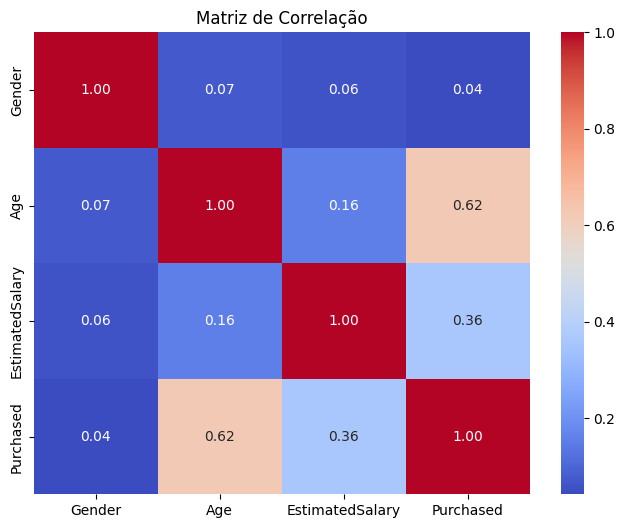

In [ ]:
# Correlação entre variáveis
df_cleaned['Gender'] = df_cleaned['Gender'].map({'Male': 0, 'Female': 1})

plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

In [ ]:
# Separar variáveis preditoras e alvo
X = df_cleaned[["Age", "EstimatedSalary"]]
y = df_cleaned["Purchased"]

# Adicionar constante para statsmodels
X = sm.add_constant(X)

# Divisão dos dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
# Modelo de Regressão Logística com statsmodels
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()

# Exibir resumo do modelo
print("\n### Resumo do Modelo ###")
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.374943
         Iterations 7

### Resumo do Modelo ###
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  300
Model:                          Logit   Df Residuals:                      297
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Jan 2025   Pseudo R-squ.:                  0.4227
Time:                        17:06:55   Log-Likelihood:                -112.48
converged:                       True   LL-Null:                       -194.85
Covariance Type:            nonrobust   LLR p-value:                 1.699e-36
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -11.1261      1.313     -8.475      0.000     -13.699 

In [ ]:
# Previsões no conjunto de teste
y_pred_probs = result.predict(X_test)

,0
209,0.266118
280,0.979522
33,0.019178
210,0.869752
93,0.013751
...,...
314,0.375304
373,0.994984
380,0.399723
239,0.989105


In [ ]:
# Análise dos Coeficientes e Odds Ratio
coefficients = result.params
odds_ratios = np.exp(coefficients)
print("\n### Coeficientes do Modelo ###")
print(coefficients)
print("\n### Odds Ratios ###")
print(odds_ratios)


### Coeficientes do Modelo ###
const             -11.126107
Age                 0.203624
EstimatedSalary     0.000034
dtype: float64

### Odds Ratios ###
const              0.000015
Age                1.225837
EstimatedSalary    1.000034
dtype: float64


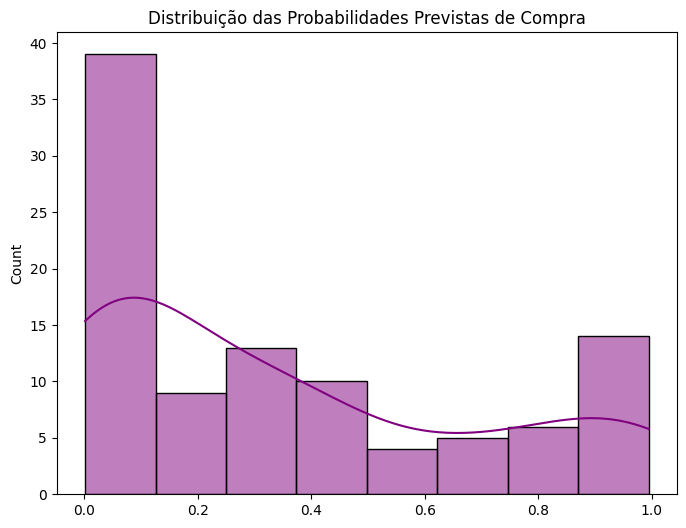

In [ ]:
# Gráfico de Probabilidades Previstas
plt.figure(figsize=(8, 6))
sns.histplot(y_pred_probs, kde=True, color='purple')
plt.title("Distribuição das Probabilidades Previstas de Compra")
plt.show()